In [43]:
import yfinance as yf
import pandas as pd

# 台積電 聯電 鴻海 台達電 台塑 聯發科
tickers_name = ['台積電', '聯電', '鴻海', '台達電', '台塑', '聯發科']

tickers = ['2330.tw', '2303.tw', '2317.tw', '2308.tw', '1301.tw', '2454.tw']
start_date ='2013-01-01'
end_date ='2022-12-31'

# data = yf.download(tickers, start=start_date, end=end_date)

data=yf.download(tickers,  # list of tickers
            period = "10y",         # time period 時間段
            interval = "1d",       # trading interval  交易區間
            ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
            prepost = False)  

print(data) 

data.to_csv('portfolio.csv')


[*********************100%***********************]  6 of 6 completed
            Adj Close                                                  
              1301.TW    2303.TW     2308.TW     2317.TW     2330.TW   
Date                                                                   
2013-04-08  44.226524   7.340847   92.690666   49.249687   72.363525  \
2013-04-09  44.163345   7.374063   93.052742   49.066833   71.628868   
2013-04-10  43.278820   7.307631   93.414810   49.127785   72.216591   
2013-04-11  44.226524   7.440495   94.501030   49.066833   74.567490   
2013-04-12  44.226524   7.340847   95.225189   47.908726   73.832840   
...               ...        ...         ...         ...         ...   
2023-03-29  92.300003  51.500000  295.500000  103.500000  530.000000   
2023-03-30  92.400002  52.099998  295.500000  104.500000  535.000000   
2023-03-31  91.800003  52.900002  301.000000  104.000000  533.000000   
2023-04-06  91.400002  52.799999  294.500000  103.500000  530.00000

In [44]:
import pandas as pd

# 讀取數據
df = pd.read_csv('portfolio.csv', index_col=0)
df1 = df[['Adj Close', 'Adj Close.1', 'Adj Close.2','Adj Close.3','Adj Close.4','Adj Close.5']]
print(df1)
# df1 = df.loc[:, ['Adj Close', 'Adj Close.1', 'Adj Close.2','Adj Close.3','Adj Close.4','Adj Close.5']]
# print(df1)
df1 = df1.drop(df1.index[0])
# print(df1)
df1 = df1.dropna()
# print(df1)
df1.columns = ['台積電', '聯電', '鴻海', '台達電', '台塑', '聯發科']
print(df1)
# df1.to_csv('portfoliodf1.csv')

                     Adj Close         Adj Close.1        Adj Close.2   
NaN                    1301.TW             2303.TW            2308.TW  \
Date                       NaN                 NaN                NaN   
2013-04-08  44.226524353027344   7.340847492218018  92.69066619873047   
2013-04-09   44.16334533691406   7.374063491821289  93.05274200439453   
2013-04-10    43.2788200378418   7.307631015777588  93.41481018066406   
...                        ...                 ...                ...   
2023-03-29   92.30000305175781                51.5              295.5   
2023-03-30    92.4000015258789  52.099998474121094              295.5   
2023-03-31   91.80000305175781  52.900001525878906              301.0   
2023-04-06    91.4000015258789   52.79999923706055              294.5   
2023-04-07   90.80000305175781  52.400001525878906              294.0   

                   Adj Close.3        Adj Close.4         Adj Close.5  
NaN                    2317.TW            2330.TW  

In [45]:
print(df1.dtypes)

台積電    object
聯電     object
鴻海     object
台達電    object
台塑     object
聯發科    object
dtype: object


In [46]:
df1['台積電'] = df1['台積電'].astype(float)
df1['聯電'] = df1['聯電'].astype(float)
df1['鴻海'] = df1['鴻海'].astype(float)
df1['台達電'] = df1['台達電'].astype(float)
df1['台塑'] = df1['台塑'].astype(float)
df1['聯發科'] = df1['聯發科'].astype(float)
print(df1.dtypes)

台積電    float64
聯電     float64
鴻海     float64
台達電    float64
台塑     float64
聯發科    float64
dtype: object


In [47]:
daily_returns = df1.pct_change() #pct_change() 為pandas的functions:Percentage change between the current and a prior element
print(daily_returns)

                 台積電        聯電        鴻海       台達電        台塑       聯發科
2013-04-08       NaN       NaN       NaN       NaN       NaN       NaN
2013-04-09 -0.001429  0.004525  0.003906 -0.003713 -0.010152 -0.001429
2013-04-10 -0.020028 -0.009009  0.003891  0.001242  0.008205  0.008584
2013-04-11  0.021898  0.018182  0.011628 -0.001241  0.032553 -0.004255
2013-04-12  0.000000 -0.013393  0.007663 -0.023603 -0.009852 -0.015670
...              ...       ...       ...       ...       ...       ...
2023-03-29  0.000000 -0.013410 -0.010050  0.004854  0.009524  0.009138
2023-03-30  0.001083  0.011650  0.000000  0.009662  0.009434  0.006468
2023-03-31 -0.006493  0.015355  0.018613 -0.004785 -0.003738  0.011568
2023-04-06 -0.004357 -0.001890 -0.021595 -0.004808 -0.005629 -0.043202
2023-04-07 -0.006565 -0.007576 -0.001698 -0.004831  0.001887 -0.005312

[2443 rows x 6 columns]


In [48]:
# 計算平均日收益率
avg_daily_return = daily_returns.mean()

# 計算平均年收益率
avg_annual_return = avg_daily_return * 252

# 計算日波動率
daily_volatility = daily_returns.std()

# 計算年波動率
annual_volatility = daily_volatility * (252 ** 0.5)


In [49]:
# 將計算後的結果列印在螢幕上
# print( daily_returns.tail())
print( avg_daily_return)
print( avg_annual_return)
print( daily_volatility)
print( annual_volatility)


台積電    0.000379
聯電     0.001010
鴻海     0.000633
台達電    0.000411
台塑     0.000941
聯發科    0.000730
dtype: float64
台積電    0.095630
聯電     0.254464
鴻海     0.159519
台達電    0.103504
台塑     0.237228
聯發科    0.184047
dtype: float64
台積電    0.013019
聯電     0.020330
鴻海     0.017938
台達電    0.014750
台塑     0.015835
聯發科    0.022518
dtype: float64
台積電    0.206666
聯電     0.322731
鴻海     0.284749
台達電    0.234152
台塑     0.251371
聯發科    0.357468
dtype: float64


In [50]:
daily_returns.cov() * 252  #協方差

,台積電,聯電,鴻海,台達電,台塑,聯發科
台積電,0.042711,0.018586,0.019697,0.018418,0.020241,0.022321
聯電,0.018586,0.104155,0.025707,0.026368,0.036925,0.039682
鴻海,0.019697,0.025707,0.081082,0.023486,0.032784,0.033136
台達電,0.018418,0.026368,0.023486,0.054827,0.026833,0.030167
台塑,0.020241,0.036925,0.032784,0.026833,0.063187,0.040882
聯發科,0.022321,0.039682,0.033136,0.030167,0.040882,0.127783


In [51]:
import numpy as np
def port_ret(weights):
    return np.sum(avg_daily_return * weights) * 252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))

In [52]:
prets = []
pvols = []
for p in range (2500):  
    weights = np.random.random(6)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

print(weights)



[0.08431375 0.23338579 0.16592515 0.18314288 0.23377453 0.0994579 ]


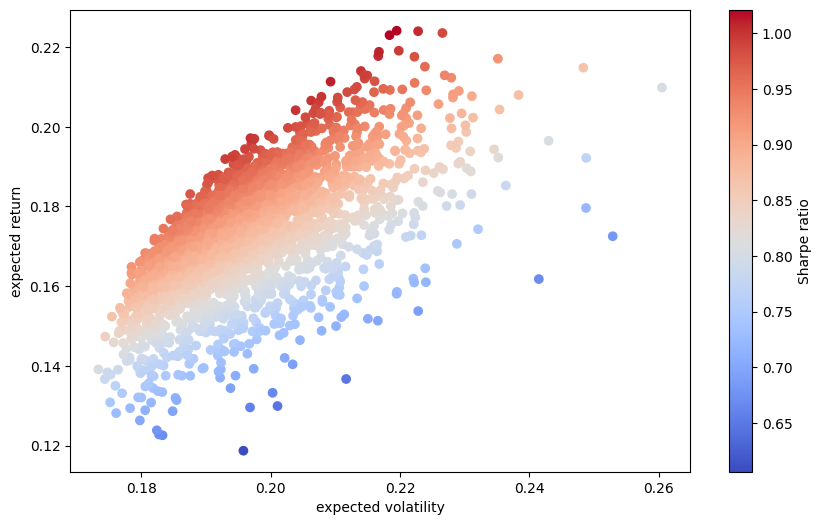

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

In [54]:
Wt=[0.1,0.1,0.2,0.1,0.2,0.3]

# print(np.ndarray(Wt))

# prets2=port_ret(np.array(Wt))
# pvols2=port_vol(np.array(Wt))


In [55]:
weights2 = np.array(Wt)  # 修改權重
ret = port_ret(weights2)  # 計算新的內部報酬率
vol = port_vol(weights2)  # 計算新的年波動率
print("New portfolio return:", ret)
print("New portfolio volatility:", vol)

New portfolio return: 0.17992313804778454
New portfolio volatility: 0.20906032786691192


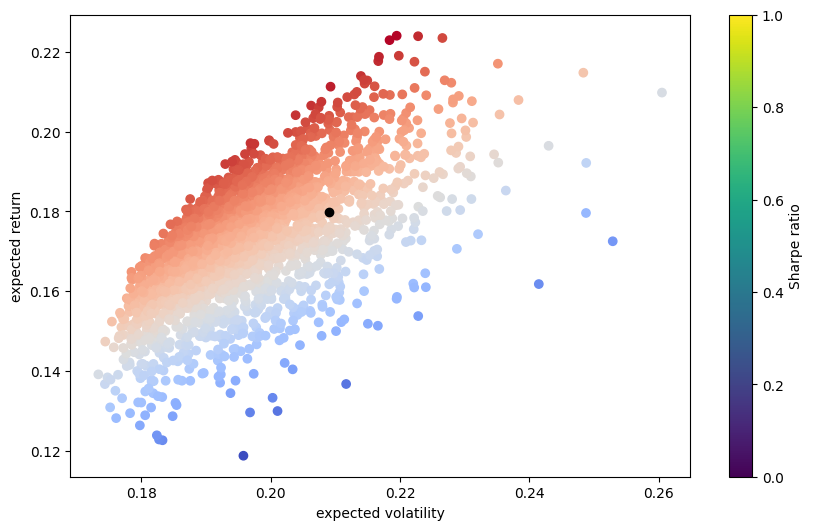

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.scatter(vol, ret, c='black',
            marker='o')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

New portfolio return: 0.18696479506871816
New portfolio volatility: 0.20156703248465382


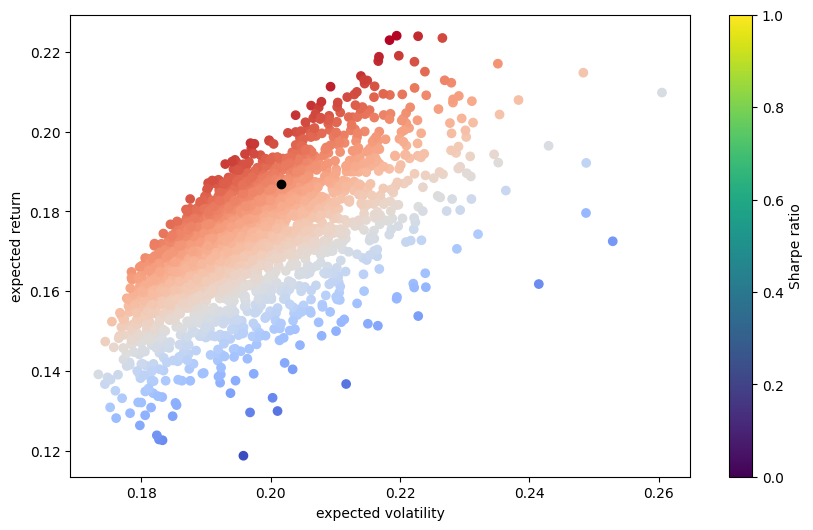

In [64]:
Wt=[0.1,0.2,0.2,0.1,0.2,0.2]

# print(np.ndarray(Wt))

# prets2=port_ret(np.array(Wt))
# pvols2=port_vol(np.array(Wt))

weights2 = np.array(Wt)  # 修改權重
ret = port_ret(weights2)  # 計算新的內部報酬率
vol = port_vol(weights2)  # 計算新的年波動率
print("New portfolio return:", ret)
print("New portfolio volatility:", vol)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.scatter(vol, ret, c='black',
            marker='o')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');